# Лабораторная 3. Линейная регрессия
## Ярослав Лукьянчук 367361
## Датасет про обучение студентов
---
1. Загрузка и предобработка данных

In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Student_Performance.csv')

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
data['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
data['Extracurricular Activities'] = pd.get_dummies(data['Extracurricular Activities'],drop_first=True)

In [12]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  uint8  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), uint8(1)
memory usage: 400.5 KB


<function matplotlib.pyplot.show(close=None, block=None)>

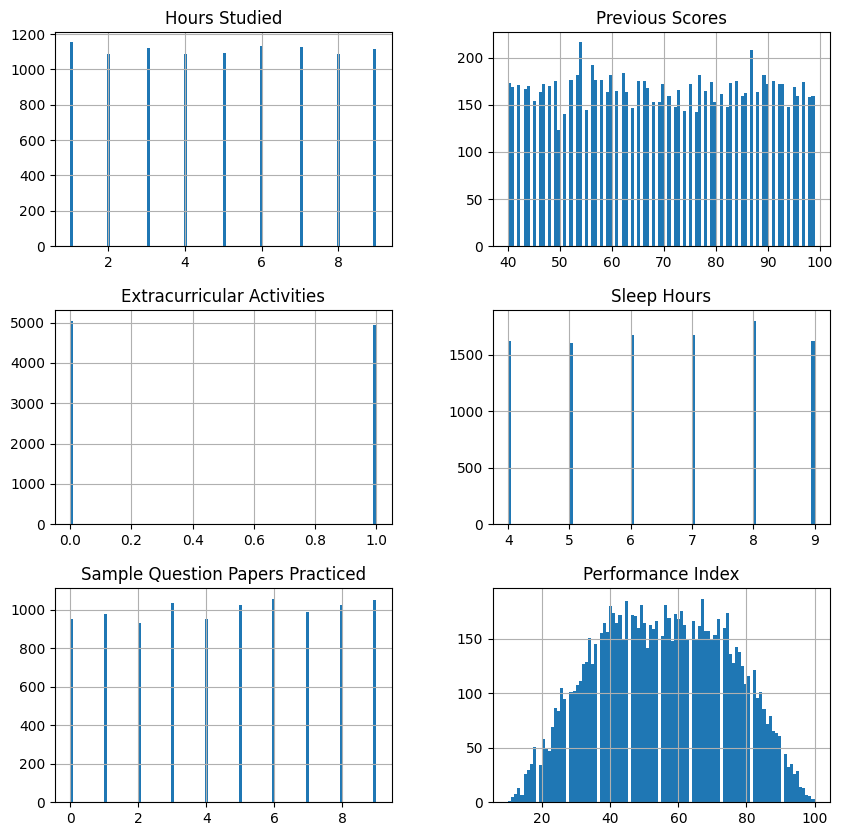

In [17]:
data.hist(bins=100, figsize=(10,10))
plt.show

<Axes: >

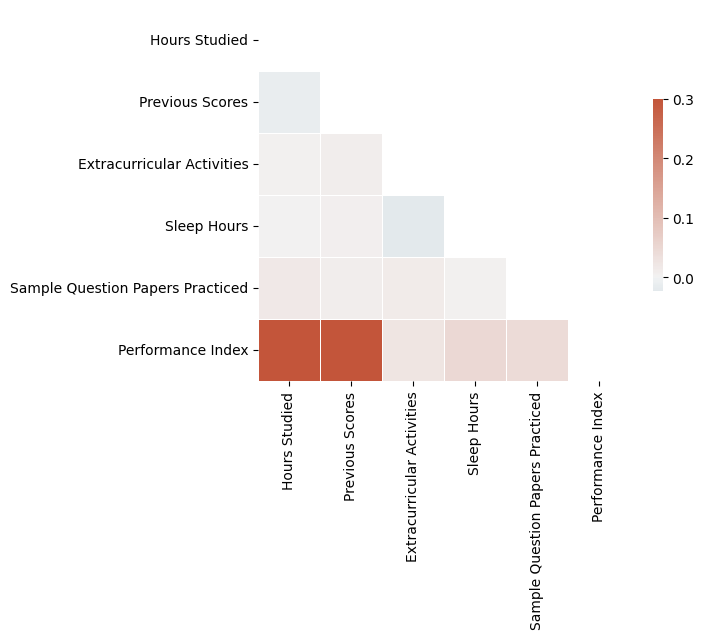

In [114]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
class MyLinearRegression:
    def __init__(self):
        self.weights = np.array([])

    def fit(self, X: np.ndarray, y: np.ndarray):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.weights

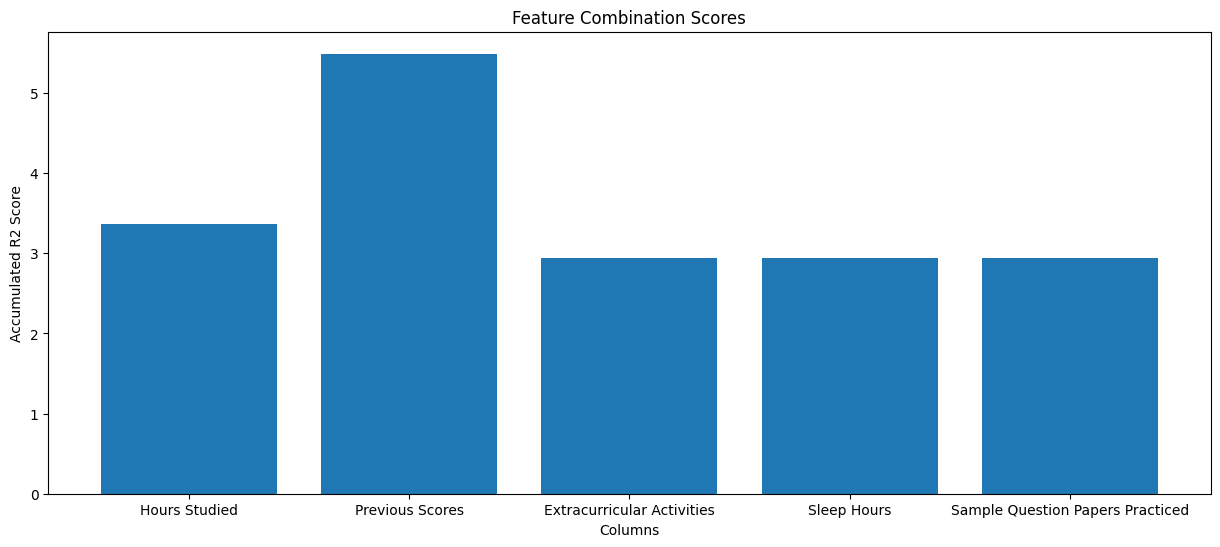

In [ ]:
columns = data.drop('Performance Index', axis=1).columns
used = set()
model = MyLinearRegression()

results = {col: 0 for col in columns}

for i in columns:
    for j in columns:
        for c in columns:
            if len(set([i, j, c])) == 3 and frozenset([i, j, c]) not in used:
                used.add(frozenset([i, j, c]))
                
                X, y = data[[i, j, c]], data['Performance Index']
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.33, random_state=42)
                
                model.fit(X_train, y_train)
                score = r2_score(y_test, model.predict(X_test))
                results[i] += score
                results[j] += score
                results[c] += score

plt.figure(figsize=(15, 6))
plt.bar(x=columns, height=[results[value] for value in results])
plt.xlabel("Columns")
plt.ylabel("Accumulated R2 Score")
plt.title("Feature Combination Scores")
plt.show()